In [1]:
import torch
import time
import cv2
import matplotlib as plt
import gym
from Gridworld_Game import Gridworld

In [2]:
GRID_SIZE = 4
env = Gridworld(Grid_size=GRID_SIZE, mode='static')

In [3]:
env.observation_space

Box(0, 1, (4, 4, 4), int32)

In [4]:
env.actions_space

Discrete(4)

In [5]:
action = env.actions_space.sample()
action

0

In [9]:
env.reset()
env.render(mode='human')
time.sleep(20)
env.close()

In [15]:
env.step(action)
env.reset()
env.render(mode='human')
time.sleep(10)
env.close()

In [7]:
actions = {'left': 0, 'right': 1, 'up': 2, 'down': 3}

In [10]:
env.step(actions['right'])

(array([[[0, 0, 0, 0],
         [1, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0],
         [0, 0, 1, 0]]]),
 -1,
 False,
 {'items': {'Agent': 0, 'Hole': 1, 'Wall': 2, 'Goal': 3},
  'Grid_size': 4,
  'actions': ['Left', 'Right', 'Up', 'Down']})

In [2]:
class Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 150)
        self.linear2 = torch.nn.Linear(150, 100)
        self.linear3 = torch.nn.Linear(100, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [12]:
EPOCHS = 3000
NUM_OBJECTS = 4
INPUT_SHAPE = GRID_SIZE**2 * NUM_OBJECTS
OUTPUT_SHAPE = len(actions)
INPUT_SHAPE

64

In [13]:
Agent = Net(INPUT_SHAPE, OUTPUT_SHAPE)
Agent

Net(
  (linear1): Linear(in_features=64, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=4, bias=True)
  (activation): ReLU()
)

In [3]:
import numpy as np

In [4]:
def preprocess_state(state, input_shape, add_noise=False):
    # best practice to add noise to the state to avoid overfitting, input_shape is a tuple here
    if add_noise == True:
        state = state.reshape(*input_shape) + np.random.rand(*input_shape)/10.0
    else:
        state = state.reshape(*input_shape)
    return state
        

In [25]:
game = Gridworld(Grid_size=GRID_SIZE, mode='static')
state1 = game.state
state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
state1

array([[1.0353653 , 0.02336607, 0.03448005, 0.09663557, 0.05221689,
        0.02590764, 0.00843381, 0.04983815, 0.08358611, 0.04083461,
        0.02963625, 0.09161092, 0.07278544, 0.01329015, 0.01864171,
        0.00360397, 0.09726974, 0.0038016 , 0.04722358, 0.02126562,
        0.01683338, 1.01898926, 0.00610096, 0.03701707, 0.08055288,
        0.01755417, 0.07935422, 0.02079477, 0.09708543, 0.05635641,
        0.05825913, 0.00680858, 0.01934912, 0.01039127, 0.06953671,
        0.05856504, 0.07889374, 0.01320755, 0.0588195 , 0.09903238,
        0.06924971, 0.02681562, 0.08880644, 0.09658162, 0.00613994,
        0.0742426 , 0.07020618, 0.01378301, 0.00141228, 0.07041025,
        0.03647548, 0.09021259, 0.02148372, 0.08117644, 0.03768324,
        1.05761722, 0.0944043 , 0.0136239 , 0.08614794, 0.05342625,
        0.05585037, 0.01396421, 1.00714996, 0.04843532]])

In [17]:
x = torch.Tensor([2.0])
x.detach?

Docstring:
Returns a new Tensor, detached from the current graph.

The result will never require gradient.

This method also affects forward mode AD gradients and the result will never
have forward mode AD gradients.

.. note::

  Returned Tensor shares the same storage with the original one.
  In-place modifications on either of them will be seen, and may trigger
  errors in correctness checks.
  IMPORTANT NOTE: Previously, in-place size / stride / storage changes
  (such as `resize_` / `resize_as_` / `set_` / `transpose_`) to the returned tensor
  also update the original tensor. Now, these in-place changes will not update the
  original tensor anymore, and will instead trigger an error.
  For sparse tensors:
  In-place indices / values changes (such as `zero_` / `copy_` / `add_`) to the
  returned tensor will not update the original tensor anymore, and will instead
  trigger an error.
Type:      builtin_function_or_method

In [5]:
import random

In [6]:
random.random?

Signature: random.random()
Docstring: random() -> x in the interval [0, 1).
Type:      builtin_function_or_method

In [6]:
def get_action(Q_val, num_actions, epsilon):
    if (random.random() < epsilon):
        action = np.random.randint(0, num_actions)
    else:
        action = np.argmax(Q_val, 1)[0]
    return action
    

In [26]:
# test get_action
epsilon = 1.0

state1 = torch.from_numpy(state1).float()
Q_val = Agent(state1) # returns a tensor with 4 elements
Q_val_numpy = Q_val.detach().numpy()
action = get_action(Q_val_numpy, len(actions), epsilon)
action    

0

In [27]:
Q_val_numpy

array([[ 0.08725256,  0.04949328, -0.02688429,  0.14180088]],
      dtype=float32)

In [7]:
class target_maker:
    def __init__(self, terminal_rewards):
        self.terminal_rewards = terminal_rewards  # +10 for reaching target, -10 for falling in hole

    def __call__(self, current_reward, gamma, maxQ):
        if current_reward not in self.terminal_rewards: #N
            Y = current_reward + (gamma * maxQ)
        else:
            Y = current_reward
        Y = torch.Tensor([Y]).detach()
        return Y
            

In [29]:
# training loop
gamma = 0.9
terminal_rewards = [-10, +10]
create_target = target_maker(terminal_rewards)
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(Agent.parameters(), lr=learning_rate)
losses = []

for i in range(EPOCHS):
    game = Gridworld(Grid_size=GRID_SIZE, mode='static')
    state1 = game.state  # state1.shape == (4, 4, 4)
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float()
    gate = 1
    while gate == 1:
        Q_val = Agent(state1) # returns a tensor with 4 elements
        Q_val_numpy = Q_val.detach().numpy()
        action = get_action(Q_val_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float()
        game.render()
        with torch.no_grad():
            newQ = Agent(state2)
        maxQ = torch.max(newQ)
        Y = create_target(reward, gamma, maxQ)
        X = Q_val.squeeze()[action]  # previously tensor([[value1, value2, etc..]])
        loss = loss_fn(X, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        state1 = state2
        losses.append(loss)
        if done == True:
            gate = 0
    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)
    game.close()
        

C:\Users\leslietetteh\.conda\envs\Reinforcement_learning\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [30]:
for i in range(10):
    game = Gridworld(Grid_size=GRID_SIZE, mode='static')
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float()
    gate = 1
    while gate == 1:
        Q_val = Agent(state1)
        Q_val_numpy = Q_val.detach().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float()
        game.render()
        time.sleep(1)
        state1 = state2
        if done == True:
            gate = 0
            game.close()
        

In [8]:
from collections import deque

In [32]:
Q_val

tensor([[ 8.3868, 10.0990,  6.2563,  8.0071]], grad_fn=<AddmmBackward0>)

In [33]:
Q_val.data

tensor([[ 8.3868, 10.0990,  6.2563,  8.0071]])

In [34]:
MEMORY_SIZE = 5000
BATCH_SIZE = 200

replay = deque(maxlen=MEMORY_SIZE)  # replay buffer

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [36]:
GPUAgent = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)

In [37]:
GPUAgent

Net(
  (linear1): Linear(in_features=64, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=4, bias=True)
  (activation): ReLU()
)

In [32]:
!pip install tqdm

In [9]:
from tqdm.auto import tqdm

In [10]:
def get_batch(replay, batch_size, device="cpu"):
    minibatch = random.sample(replay, batch_size)
    state1_batch = torch.cat([s1 for (s1, a, r, s2, d) in minibatch]).to(device)
    action_batch = torch.Tensor([a for (s1, a, r, s2, d) in minibatch]).long().to(device)
    reward_batch = torch.Tensor([r for (s1, a, r, s2, d) in minibatch]).to(device)
    state2_batch = torch.cat([s2 for (s1, a, r, s2, d) in minibatch]).to(device)
    done_batch = torch.Tensor([d for (s1, a, r, s2, d) in minibatch]).to(device)
    return state1_batch, action_batch, reward_batch, state2_batch, done_batch
    

In [11]:
def batch_target(reward_batch, gamma, maxQ, done_batch):
    Y = reward_batch + (gamma * maxQ * (1 - done_batch))
    return Y

In [12]:
def reward_metric(all_rewards_list, last_n_rewards = 20):
    print(len(all_rewards_list))
    if len(all_rewards_list) >= last_n_rewards:
        mean_reward = np.mean(all_rewards_list[-last_n_rewards:])
    else:
        mean_reward = 0
    return mean_reward

In [13]:
def update(loss, optimizer):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [14]:
from IPython.display import clear_output

In [44]:
loss_fn = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(GPUAgent.parameters(), lr=0.001)

In [45]:
epsilon = 1.0

for i in tqdm(range(EPOCHS)):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800,800,3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while status == 1:
        qval = GPUAgent(state1)
        qval_numpy = qval.data.detach().cpu().numpy()
        action = get_action(qval_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)

        exp = (state1, action, reward, state2, done)
        replay.append(exp)

        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = GPUAgent(state1_batch)

            with torch.no_grad():
                Q2 = GPUAgent(state2_batch)
            maxQ = torch.max(Q2, axis = 1)[0].to(device)  # returns maxQ tensor

            Y = batch_target(reward_batch, gamma, maxQ, done_batch).to(device)

            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze().to(device)
            loss = loss_fn(X, Y)
            print(i, loss.item())
            clear_output(wait=True)

            losses.append(loss.item())
            update(loss, optimizer)
        
        state1 = state2.to(device)
        if done == True:
            status = 0

    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

2999 0.07141701877117157


In [48]:
for i in range(20):
    game = Gridworld(Grid_size=GRID_SIZE, mode='random')
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    gate = 1
    while gate == 1:
        Q_val = GPUAgent(state1)
        Q_val_numpy = Q_val.detach().cpu().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        state1 = state2
        game.render()
        time.sleep(1)
        state1 = state2
        if done == True:
            gate = 0
            game.close()
        

In [47]:
game.close()

In [36]:
learning_rate = 0.001
GPUAgent = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)

loss_fn = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(GPUAgent.parameters(), lr=learning_rate)

In [67]:
epsilon = 1.0
EPOCHS = 1000

all_rewards_list = []
mean_rewards = []

for i in tqdm(range(EPOCHS)):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800,800,3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while status == 1:
        qval = GPUAgent(state1)
        qval_numpy = qval.data.detach().cpu().numpy()
        action = get_action(qval_numpy, len(actions), epsilon)
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)

        exp = (state1, action, reward, state2, done)
        replay.append(exp)

        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = GPUAgent(state1_batch)

            with torch.no_grad():
                Q2 = GPUAgent(state2_batch)
            maxQ = torch.max(Q2, axis = 1)[0].to(device)  # returns maxQ tensor

            Y = batch_target(reward_batch, gamma, maxQ, done_batch).to(device)

            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze().to(device)
            loss = loss_fn(X, Y)
            print(i, loss.item())

            losses.append(loss.item())
            update(loss, optimizer)

            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 100)
            mean_rewards.append(mean_reward)

            print(reward, mean_reward)
            clear_output(wait=True)
        
        state1 = state2.to(device)
        if done == True:
            status = 0

    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

KeyboardInterrupt: 

Text(0, 0.5, 'rewards')

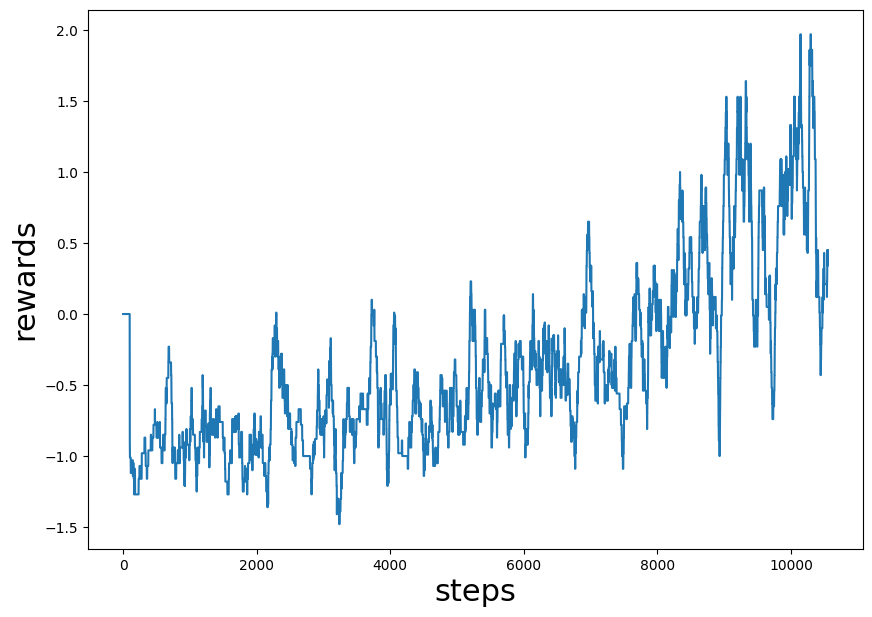

In [66]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.xlabel("steps", fontsize=22)
plt.ylabel("rewards", fontsize=22)

In [15]:
import matplotlib.pyplot as plt

In [40]:
from collections import deque
import copy

MEMORY_SIZE = 5000
BATCH_SIZE = 200
EPOCHS = 3000
replay = deque(maxlen=MEMORY_SIZE)
max_moves = 50
gamma = 0.9
learning_rate = 0.001
sync_freq = 30
k = 0
losses = []
Agent_NN = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)
Target_NN = copy.deepcopy(Agent_NN)
Target_NN.load_state_dict(Agent_NN.state_dict())

optimizer = torch.optim.Adam(Agent_NN.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
epsilon = 1.0

all_rewards_list = []
mean_rewards = []

for i in range(EPOCHS):
    game = Gridworld(Grid_size=4, mode='random', frame_size=(800, 800, 3))
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    mov = 0
    while status == 1:
        k += 1
        qval = Agent_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()

        action = get_action(qval_, 4, epsilon)
        state2, reward, done, _ = game.step(action)

        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        exp = (state1, action, reward, state2, done)
        replay.append(exp)
        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = Agent_NN(state1_batch)
            with torch.no_grad():
                Q2 = Target_NN(state2_batch)
            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y)
            print(i, loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            update(loss, optimizer)

            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 100)
            mean_rewards.append(mean_reward)

        state1 = state2

        if k % sync_freq == 0:
            Target_NN.load_state_dict(Agent_NN.state_dict())
        
        if done == True:
            status = 0
    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

30525


In [17]:
import gym
env = gym.make('MountainCar-v0')

In [16]:
print(env.observation_space) # minHeight=-1.2, maxHeight=0.6, minVel= -0.07, maxVel= 0.07

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [17]:
env.observation_space.sample()  # returns array representing height and velocity variables

array([ 0.31065768, -0.04932839], dtype=float32)

In [18]:
env.action_space  # 3 discrete actions

Discrete(3)

In [19]:
env.action_space.sample()

2

In [18]:
actions = {'left':0, 'do_nothing':1, 'right':2}

In [21]:
env.reset()

array([-0.5396258,  0.       ], dtype=float32)

In [22]:
env.step(actions['right'])  # represents new state, and reward which is -1.0
# False variable tells us whether terminal state or not

(array([-0.5385057 ,  0.00112016], dtype=float32), -1.0, False, {})

In [23]:
env.render(mode="human")

True

In [24]:
env.close()

In [25]:
INPUT_SHAPE = env.observation_space.sample().shape[0]
print("input shape: ", INPUT_SHAPE)
OUTPUT_SHAPE = len(actions)
print("output shape: ", OUTPUT_SHAPE)

input shape:  2
output shape:  3


In [16]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

class Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 20)
        self.linear2 = torch.nn.Linear(20, 10)
        self.linear3 = torch.nn.Linear(10, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [27]:
from collections import deque
import copy

MEMORY_SIZE = 10000
BATCH_SIZE = 200
EPOCHS = 2000
replay = deque(maxlen=MEMORY_SIZE)
gamma = 0.9
learning_rate = 0.001
sync_freq = 100
k = 0
losses = []
Agent_NN = Net(INPUT_SHAPE, OUTPUT_SHAPE).to(device)
Target_NN = copy.deepcopy(Agent_NN)
Target_NN.load_state_dict(Agent_NN.state_dict())

optimizer = torch.optim.Adam(Agent_NN.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
epsilon = 1.0

all_rewards_list = []
mean_rewards = []

for i in range(EPOCHS):
    game = gym.make('MountainCar-v0')
    state1 = game.reset()
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while status == 1:
        k += 1
        qval = Agent_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()

        action = get_action(qval_, 3, epsilon)
        print(action)
        state2, reward, done, _ = game.step(action)
        
        if state2[0] >= 0.5:
            reward = 100

        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        
        exp = (state1, action, reward, state2, done)
        replay.append(exp)
        game.render()
        
        if len(replay) > BATCH_SIZE:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, BATCH_SIZE, device)
            Q1 = Agent_NN(state1_batch)
            with torch.no_grad():
                Q2 = Target_NN(state2_batch)
            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y)
            print(i, loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            update(loss, optimizer)

        state1 = state2

        if k % sync_freq == 0:
            Target_NN.load_state_dict(Agent_NN.state_dict())
        
        if done == True:            
            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 10)
            mean_rewards.append(mean_reward)
            status = 0
    if epsilon > 0.1:
        epsilon -= (1/EPOCHS)

1
1978 0.0030766010750085115


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [28]:
game.close()

Text(0, 0.5, 'losses')

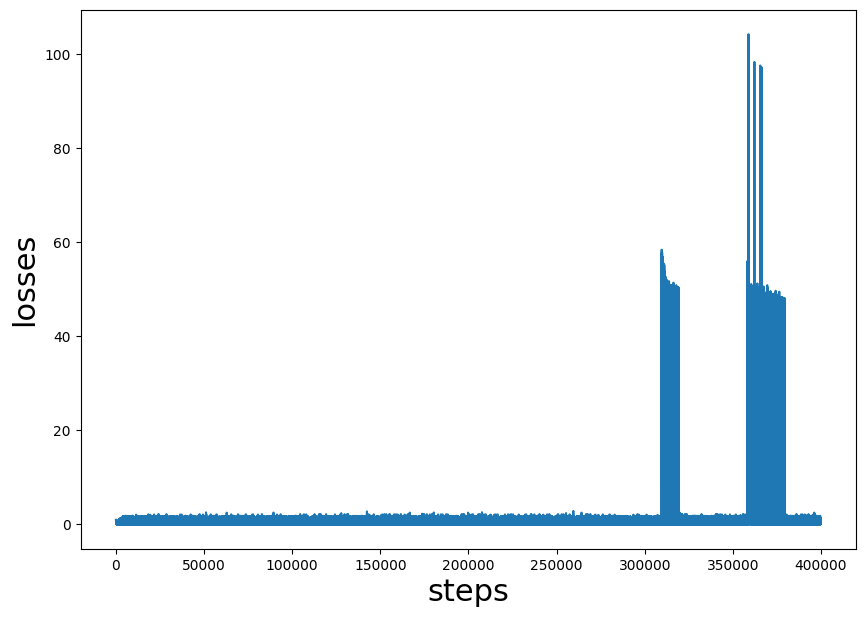

In [29]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("steps", fontsize=22)
plt.ylabel("losses", fontsize=22)

In [30]:
for i in range(10):
    game = gym.make('MountainCar-v0')
    game.reset()
    state1 = game.state
    state1 = preprocess_state(state1, (1, INPUT_SHAPE), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    gate = 1
    mov = 0
    while gate == 1:
        mov += 1
        Q_val = Agent_NN(state1)
        Q_val_numpy = Q_val.detach().cpu().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)
        state2 = preprocess_state(state2, (1, INPUT_SHAPE), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        game.render()
        state1 = state2
        if done == True:
            gate = 0
            game.close()

In [17]:
from torch.distributions.multivariate_normal import MultivariateNormal

def get_action_from_multivariate_normal_distribution(previous_states, next_states):
    cov = torch.cov(previous_states.T)
    mean = torch.mean(previous_states, dim=0)
    log_probs = MultivariateNormal(mean, cov).log_prob(next_states)
    probs = torch.exp(log_probs)
    return torch.argmin(probs).item()

In [32]:
# converts actions to one-hot encoded vector and appends to state vector
Dynamics_input_shape = env.observation_space.sample().shape[0] + len(actions) # [pos,vel,l,n,r]
Dynamics_output_shape = env.observation_space.sample().shape[0] # [pos,vel]

In [33]:
Dynamics_NN = Net(Dynamics_input_shape, Dynamics_output_shape).to(device)

In [34]:
device

'cuda'

In [93]:
!ls *JPG

notes.JPG


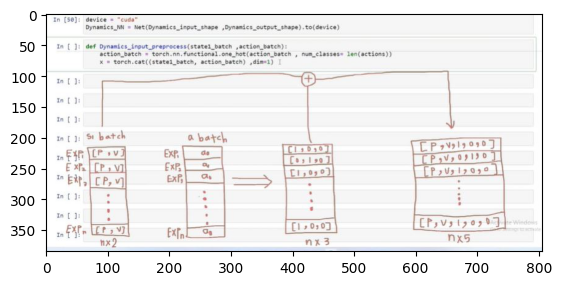

In [53]:
import matplotlib.pyplot as plt
x=plt.imread('notes.JPG')
plt.imshow(x)
plt.show()

In [18]:
def Dynamics_input_preprocess(state1_batch, action_batch):
    action_batch = torch.nn.functional.one_hot(action_batch, num_classes=len(actions))
    x = torch.cat((state1_batch, action_batch), dim=1) # 0 = row dimension, 1 = column dimension
    return x

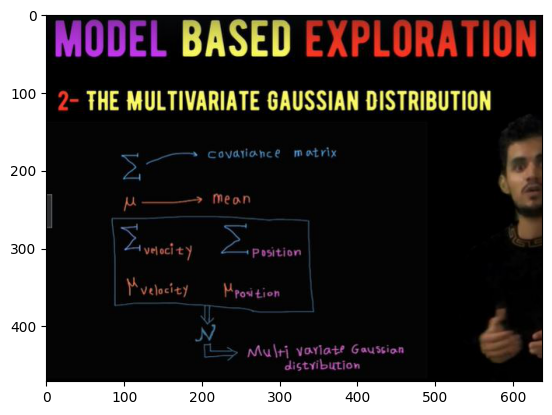

In [106]:
x=plt.imread('multivariategaussiandistribution.JPG')
plt.imshow(x)
plt.show()

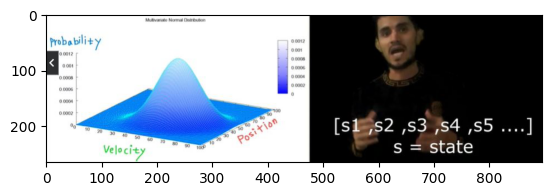

In [107]:
x=plt.imread('multivariategaussiandistribution1.JPG')
plt.imshow(x)
plt.show()

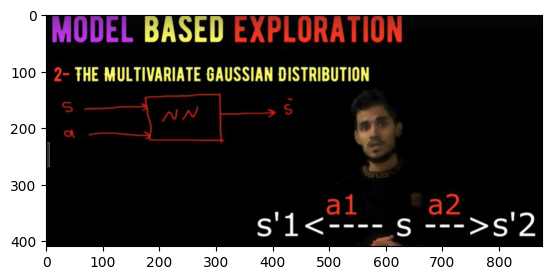

In [108]:
# dynamics neural network is used to predict the next state
x=plt.imread('multivariategaussiandistribution2.JPG')
plt.imshow(x)
plt.show()

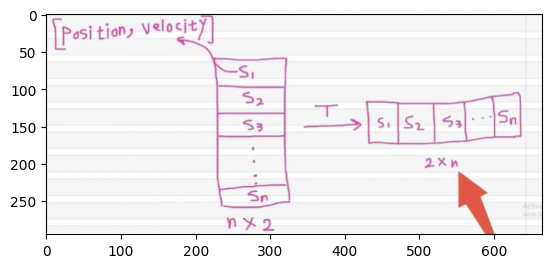

In [109]:
x=plt.imread('multivariategaussiandistribution3.JPG')
plt.imshow(x)
plt.show()

In [19]:
### DQN with Model-Based Exploration

from torch.distributions.multivariate_normal import MultivariateNormal

def get_action_from_multivariatenormal_distribution(previous_states, next_states):
    # previous_state.T == previous_states.transpose()
    cov = torch.cov(previous_states.T) 
    mean = torch.mean(previous_states, dim=0) # mean of rows
    log_probs = MultivariateNormal(mean, cov).log_prob(next_states)
    probs = torch.exp(log_probs)
    return torg.argmin(probs).item()

In [47]:
from collections import deque
import copy

memory_size = 10000
batch_size = 100
replay = deque(maxlen=memory_size)
gamma = 0.99
Q_learning_rate = 0.002
Dynamics_learning_rate = 0.002
input_shape = 2
output_shape = 3
epochs = 2000
sync_freq = 100
N_recent_states = 50     # number of recent states to create multivariate gaussian distribution
exploration_only_steps = 10000
device = "cuda"
Q_losses = []
Dynamics_losses = []
mean_reward = 0
k = 0
Agent_NN = Net(input_shape, output_shape).to(device)
target_NN = copy.deepcopy(Agent_NN)
target_NN.load_state_dict(Agent_NN.state_dict())
Dynamics_input_shape = env.observation_space.sample().shape[0] + len(actions)
Dynamics_output_shape = env.observation_space.sample().shape[0]
Dynamics_NN = Net(Dynamics_input_shape, Dynamics_output_shape).to(device)

Q_optimizer = torch.optim.Adam(Agent_NN.parameters(), lr=Q_learning_rate)
Dynamics_optimizer = torch.optim.Adam(Dynamics_NN.parameters(), lr=Dynamics_learning_rate)

Q_loss_fn = torch.nn.MSELoss()
Dynamics_loss_fn = torch.nn.MSELoss()
epsilon = 1.

all_rewards_list = []
mean_rewards = []

for i in range(epochs):
    game = gym.make('MountainCar-v0')
    state1 = game.reset()
    state1 = preprocess_state(state1, (1, input_shape), add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1

    while status == 1:
        k += 1
        qval = Agent_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()

        
        print(len(replay))
        
        if (len(replay) < exploration_only_steps or (random.random() < epsilon)) and (len(replay) > N_recent_states):
            with torch.no_grad():
                previous_states = torch.cat([s2 for (s1,a,r,s2,d) in list(replay)[-N_recent_states:]]) # last 50 experience
                all_possible_actions = torch.arange(len(actions)).to(device) # tensor([0, 1, 2])
                Dynamics_inputs = Dynamics_input_preprocess(state1.repeat(len(actions), 1), all_possible_actions)
                Dynamics_preds = Dynamics_NN(Dynamics_inputs)  # predicts each of the next states for all possible actions
                action = get_action_from_multivariate_normal_distribution(previous_states, Dynamics_preds) # gets lowest probability action

        else:
            action = np.argmax(qval_, 1)[0]

        state2, reward, done, _ = game.step(action)

        if state2[0] >= 0.5:
            reward = 10

        state2 = preprocess_state(state2, (1, input_shape), add_noise=True) 
        state2 = torch.from_numpy(state2).float().to(device)
        exp = (state1, action, reward, state2, done)
        replay.append(exp)

        if len(replay) > batch_size:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, batch_size, device)
            Q1 = Agent_NN(state1_batch)
            with torch.no_grad():
                Q2 = target_NN(state2_batch)
            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            Q_loss = Q_loss_fn(X, Y)
            Q_losses.append(Q_loss.item())
            update(Q_loss, Q_optimizer)

            Dynamics_inputs = Dynamics_input_preprocess(state1_batch.detach(), action_batch.detach())

            Dynamics_preds = Dynamics_NN(Dynamics_inputs.detach())
            Dynamics_targets = state2_batch
            Dynamics_loss = Dynamics_loss_fn(Dynamics_preds, Dynamics_targets)
            Dynamics_losses.append(Dynamics_loss.item())
            update(Dynamics_loss, Dynamics_optimizer)
            print(i, "\nQ_loss: ", Q_loss.item(), "\nDynamics_loss: ", Dynamics_loss.item(), "\nMean reward: ", mean_reward)
            clear_output(wait=True)

        state1 = state2

        if k % sync_freq == 0:
            target_NN.load_state_dict(Agent_NN.state_dict())

        if done == True:
            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 10)
            mean_rewards.append(mean_reward)
            status = 0
            game.close()
    if epsilon > 0.01:
        epsilon -= (1.0/epochs)
            
    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text(0, 0.5, 'mean_rewards')

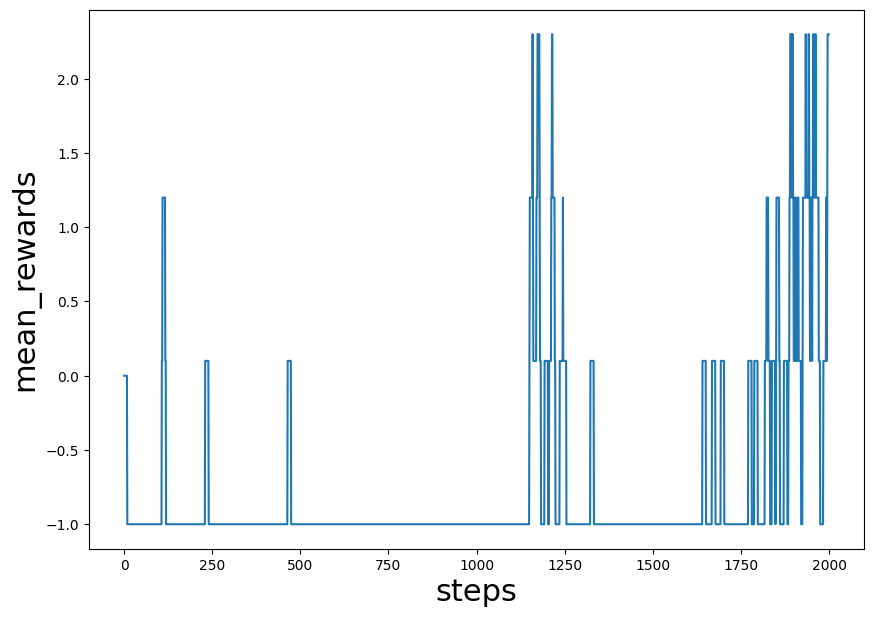

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(mean_rewards)
plt.xlabel("steps", fontsize=22)
plt.ylabel("mean_rewards", fontsize=22)

Text(0, 0.5, 'mean_rewards')

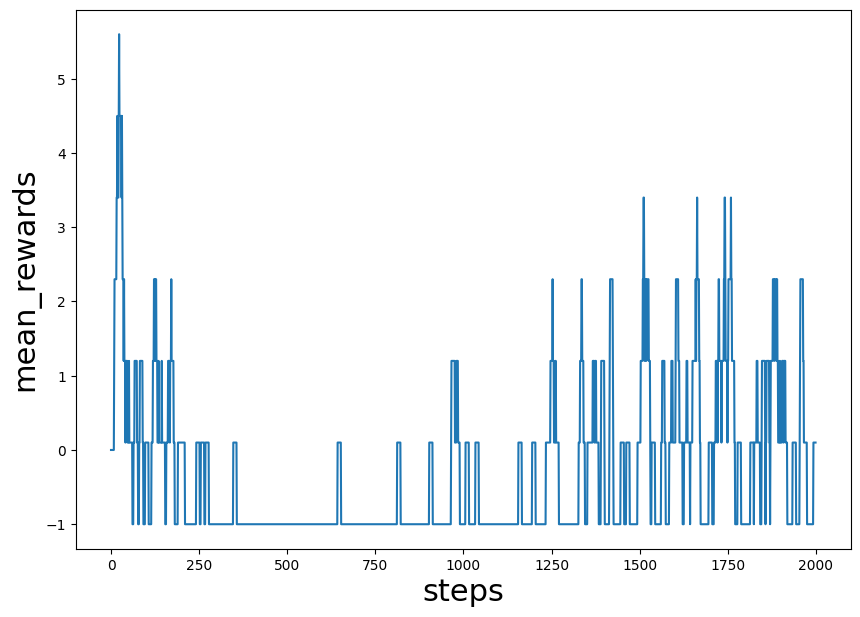

In [48]:
plt.figure(figsize=(10, 7))
plt.plot(mean_rewards)
plt.xlabel("steps", fontsize=22)
plt.ylabel("mean_rewards", fontsize=22)

In [42]:
torch.save(Agent_NN, "Agent.pt")
Agent_NN = torch.load("Agent.pt")
Agent_NN.eval()

Net(
  (linear1): Linear(in_features=2, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (activation): ReLU()
)

In [44]:
for i in range(10):
    game = gym.make("MountainCar-v0")
    state1 = game.reset()
    state1 = preprocess_state(state1, (1, input_shape), add_noise=True)

    state1 = torch.from_numpy(state1).float().to(device)
    gate = 1
    while gate == 1:
        Q_val = Agent_NN(state1)
        Q_val_numpy = Q_val.detach().cpu().numpy()
        action = np.argmax(Q_val_numpy, 1)[0]
        state2, reward, done, _ = game.step(action)

        state2 = preprocess_state(state2, (1, input_shape), add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        game.render()
        time.sleep(0.01)
        if done == True:
            gate = 0
            game.close()
        state1 = state2

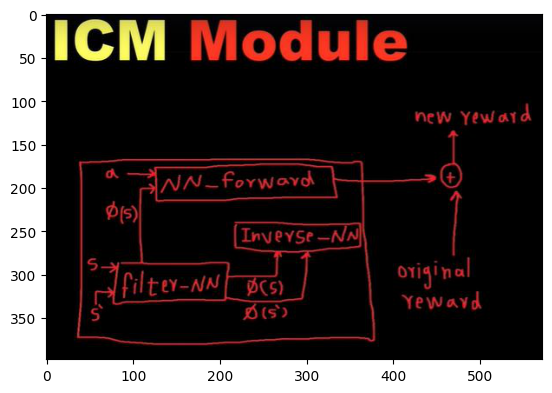

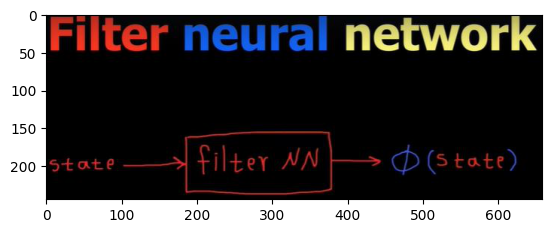

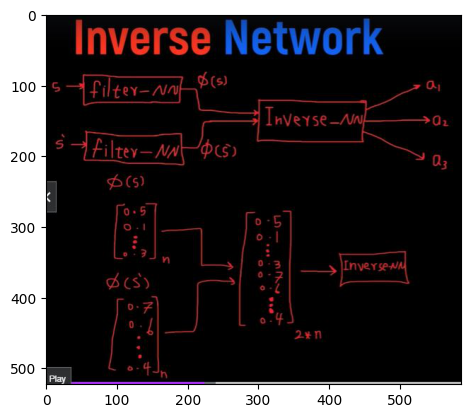

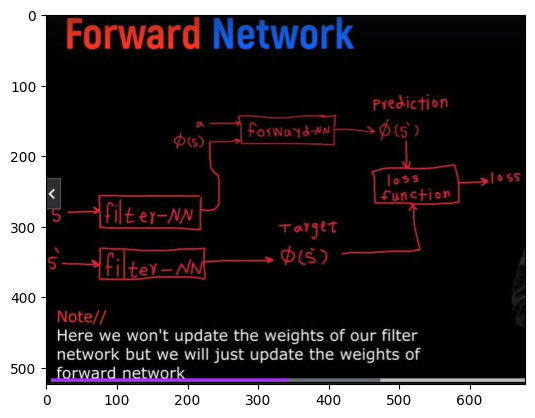

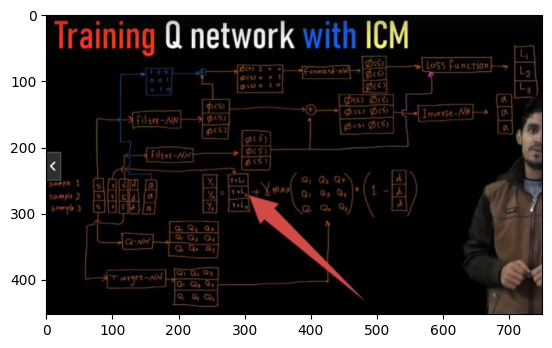

In [67]:
x=plt.imread('../icm-module.JPG')
plt.imshow(x)
plt.show()
x=plt.imread('../icm-module00.JPG')
plt.imshow(x)
plt.show()
x=plt.imread('../icm-module01.JPG')
plt.imshow(x)
plt.show()
x=plt.imread('../icm-module02.JPG')
plt.imshow(x)
plt.show()
x=plt.imread('../icm-module03.JPG')
plt.imshow(x)
plt.show()

In [20]:
class filter_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(filter_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = torch.nn.functional.normalize(x)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = torch.nn.Tanh()(x)  # output passed to second neural network so activation function
        return x    

In [24]:
input_filter_shape = env.observation_space.sample().shape[0]
output_filter_shape = 3
filter_NN = filter_Net(input_filter_shape, output_filter_shape).to(device)

In [21]:
class inverse_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(inverse_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = torch.nn.functional.softmax(x, dim=1)
        return x

In [25]:
input_inverse_shape = output_filter_shape * 2
output_inverse_shape = 3 # len(actions)
inverse_NN = inverse_Net(input_inverse_shape, output_inverse_shape).to(device)

In [22]:
def inverse_input_preprocess(filtered_state1_batch, filtered_state2_batch):
    x = torch.cat((filtered_state1_batch, filtered_state2_batch), dim=1)
    return x

In [23]:
class forward_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(forward_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = torch.nn.Tanh()(x)
        return x

In [24]:
def forward_input_preprocess(filtered_state1_batch, action_batch):
    action_batch = torch.nn.functional.one_hot(action_batch, num_classes=len(actions))
    x = torch.cat([filtered_state1_batch, action_batch], dim=1)
    return x

In [29]:
input_forward_shape = output_filter_shape + len(actions)
output_forward_shape = output_filter_shape
forward_NN = forward_Net(input_forward_shape, output_forward_shape).to(device)

In [30]:
forward_NN

forward_Net(
  (linear1): Linear(in_features=6, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=3, bias=True)
  (activation): ReLU()
)

In [25]:
class Q_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Q_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 128)
        self.linear2 = torch.nn.Linear(128,128)
        self.linear3 = torch.nn.Linear(128, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [27]:
import copy
from collections import deque

input_Q_shape = env.observation_space.sample().shape[0]
output_Q_shape = len(actions)
Agent_Q_NN = Q_Net(input_Q_shape, output_Q_shape).to(device)
target_Q_NN = copy.deepcopy(Agent_Q_NN)
target_Q_NN.load_state_dict(Agent_Q_NN.state_dict())

NameError: name 'actions' is not defined

In [40]:
memory_size = 100000
batch_size = 200
replay = deque(maxlen=memory_size)
gamma = 0.99
learning_rate = 0.001
epochs = 500
sync_freq = 100
mean_reward = 0
external_rewards = []
kappa = 0
input_shape = 2 
beta = 0.1
lamda = 0.2
Q_losses = []
inverse_losses = []
forward_losses = []
k = 0

all_params = list(Agent_Q_NN.parameters()) + list(filter_NN.parameters()) + list(forward_NN.parameters()) + list(inverse_NN.parameters())
optimizer = torch.optim.Adam(all_params, lr=learning_rate)

inverse_loss = torch.nn.CrossEntropyLoss(reduction='none')
forward_loss = torch.nn.MSELoss(reduction='none') # shape of result == shape of input tensors as reduction='none'
Q_loss = torch.nn.MSELoss()
epsilon = 0.2
all_rewards_list = []
mean_rewards = []

for i in range(epochs):
    game = gym.make('MountainCar-v0')
    game.reset()
    state1 = game.reset()
    state1 = preprocess_state(state1, (1, input_shape), add_noise=False)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    while (status == 1):
        k = k + 1
        qval = Agent_Q_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()
        action = get_action(qval_, 3, epsilon)
        state2, reward, done, _ = game.step(action)

        if state2[0] >= 0.5:
            reward = 10

        state2 = preprocess_state(state2, (1, input_shape), add_noise=False)
        state2 = torch.from_numpy(state2).float().to(device)
        exp = (state1, action, reward, state2, done)
        replay.append(exp)
        game.render()
        if len(replay) > batch_size:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, batch_size, device)
            
            filtered_state1_batch = filter_NN(state1_batch.detach()) #state1 batch passed through filterNN
            filtered_state2_batch = filter_NN(state2_batch.detach())
            forward_NN_input = forward_input_preprocess(filtered_state1_batch, action_batch).detach()
            # detach() is used above to prevent optimizer treating forward and filter NN as a single NN
            
            filtered_state2_batch_pred = forward_NN(forward_NN_input)

            forward_pred_err = forward_loss(filtered_state2_batch_pred,
                                            filtered_state2_batch.detach()).sum(dim=1).unsqueeze(dim=1)
            # detach() here is used to prevent optimizer treating forward and filter NN as a single NN
            # sum each sample along the column dimension, as forward loss will return a loss for each column
            forward_losses.append(forward_pred_err.mean().item())
            print("forward loss: ", forward_pred_err.mean().item())
            new_reward_batch = forward_pred_err.detach().squeeze() + reward_batch 
            # squeeze() used to remove column dimension we added with unsqueeze() above

            inverse_NN_input = inverse_input_preprocess(filtered_state1_batch, filtered_state2_batch)
            # no detach as we want optimizer to treat these as one 
            pred_action_batch = inverse_NN(inverse_NN_input)
            inverse_pred_err = inverse_loss(pred_action_batch, action_batch.detach()).unsqueeze(dim=1) 
            # result is 1D tensor, unsqueeze() converts to 2D tensor by adding column dimension
            inverse_losses.append(inverse_pred_err.mean().item())
            print("inverse loss: ", inverse_pred_err.mean().item())

            Q1 = Agent_Q_NN(state1_batch.detach())

            with torch.no_grad():
                Q2 = target_Q_NN(state2_batch) # return Q2 tensor
            maxQ = torch.max(Q2, axis=1)[0]

            Y = batch_target(new_reward_batch.detach(), gamma, maxQ, done_batch) # computes target tensor
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            Q1_pred_err = Q_loss(X, Y)

            loss = (1 - beta) * forward_pred_err + beta * inverse_pred_err
            # forward_pred_err and inverse_pred_err are 2D tensors so can be added together
            loss = loss.sum() / loss.flatten().shape[0]
            loss = lamda * Q1_pred_err + loss
            update(loss, optimizer)
            print(i, "Q loss:", Q1_pred_err.item())

            Q_losses.append(Q1_pred_err.item())
            print("mean_reward: ", mean_reward)
            clear_output(wait=True)

        state1 = state2

        if k % sync_freq == 0:
            target_Q_NN.load_state_dict(Agent_Q_NN.state_dict())

        
        if done == True:
            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 10)
            mean_rewards.append(mean_reward)
            print("mean_reward: ", mean_reward)
            status = 0
            game.close()

    if epsilon > 0.01:
        epsilon -= (1/epochs)

500
mean_reward:  8.9


Text(0, 0.5, 'Q_losses')

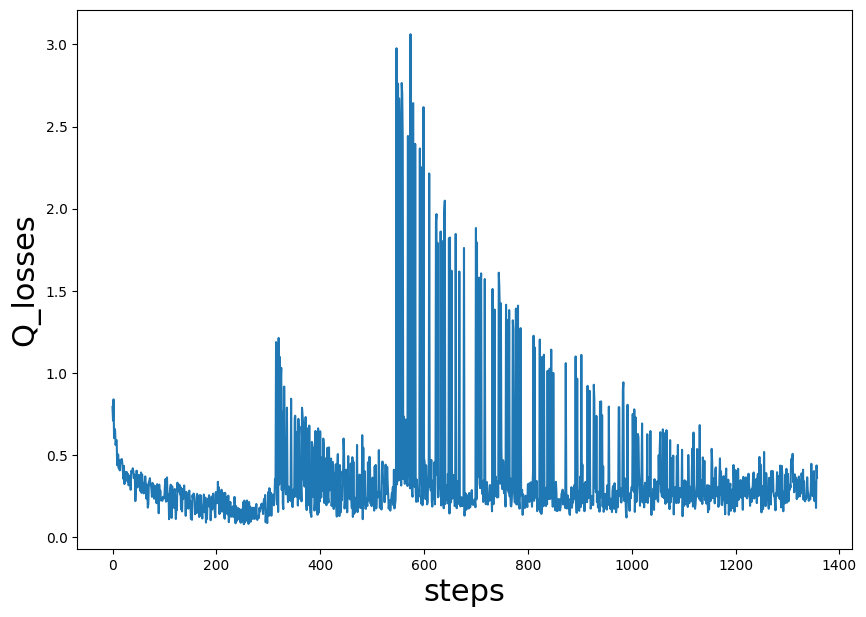

In [38]:
plt.figure(figsize=(10,7))
plt.plot(Q_losses)
plt.xlabel("steps", fontsize=22)
plt.ylabel("Q_losses", fontsize=22)

In [37]:
game.close()

In [26]:
class P_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(P_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, 10)
        self.linear4 = torch.nn.Linear(10, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = self.activation(x)
        x = self.linear4(x)
        return x

In [65]:
input_P_shape = env.observation_space.sample().shape[0]
output_P_shape = 3

P_NN = P_Net(input_P_shape, output_P_shape).to(device)

In [27]:
class T_Net(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        super(T_Net, self).__init__()
        self.linear1 = torch.nn.Linear(input_shape, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, output_shape)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [38]:
input_T_shape = env.observation_space.sample().shape[0]
output_T_shape = output_P_shape
T_NN = T_Net(input_T_shape, output_T_shape).to(device)

In [39]:
T_NN

T_Net(
  (linear1): Linear(in_features=2, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=3, bias=True)
  (activation): ReLU()
)

In [28]:
def get_batch_for_RND(replay, batch_size, device="cpu"):
    # members in a batch are a list of consecutive states of batch_siize length
    idxs = [i for i in range(len(list(replay)))][batch_size:]
    idx = random.choice(idxs)
    _,_,_,_,_,f = list(replay)[idx]

    if f < batch_size:
        if (len(replay) - idx) > (batch_size - f):
            minibatch = list(replay)[idx - f : idx + (batch_size - f)]
        else:
            minibatch = list(replay)[idx - batch_size : idx]
    else:
        minibatch = list(replay)[idx - batch_size : idx]
    
    state1_batch = torch.cat([s1 for (s1, a, r, s2, d, _) in minibatch]).to(device)
    action_batch = torch.Tensor([a for (s1, a, r, s2, d, _) in minibatch]).long().to(device)
    reward_batch = torch.Tensor([r for (s1, a, r, s2, d, _) in minibatch]).to(device)
    state2_batch = torch.cat([s2 for (s1, a, r, s2, d, _) in minibatch]).to(device)
    done_batch = torch.Tensor([d for (s1, a, r, s2, d, _) in minibatch]).to(device)
    mean = torch.mean(state1_batch, dim=0)
    std = torch.std(state1_batch, dim=0)
    return state1_batch, action_batch, reward_batch, state2_batch, done_batch, mean, std

In [66]:
from collections import deque
import copy

input_shape = 2
output_shape = 3
memory_size = 100000
batch_size = 64
replay = deque(maxlen=memory_size)
gamma = 0.99
P_learning_rate = 0.00001
Q_learning_rate = 0.001
epochs = 500
sync_freq = 100
k = 0
mean_reward = 0
Q_losses = []
P_losses = []
Agent_NN = Net(input_shape, output_shape).to(device)
target_NN = copy.deepcopy(Agent_NN)
target_NN.load_state_dict(Agent_NN.state_dict())

P_optimizer = torch.optim.Adam(P_NN.parameters(), lr=P_learning_rate)
Q_optimizer = torch.optim.Adam(Agent_NN.parameters(), lr=Q_learning_rate)

P_loss_fn = torch.nn.MSELoss(reduction="none")
Q_loss_fn = torch.nn.MSELoss()

epsilon = 0.2

all_rewards_list = []
mean_rewards = []
for i in range(epochs):
    game = gym.make('MountainCar-v0')
    state1 = game.reset()
    state1 = preprocess_state(state1, (1, input_shape), add_noise=False)
    state1 = torch.from_numpy(state1).float().to(device)
    status = 1
    f = 0
    while (status == 1):
        k = k + 1
        f = f + 1
        qval = Agent_NN(state1)
        qval_ = qval.data.detach().cpu().numpy()

        if len(replay) < batch_size:
            action = get_action(qval_, 3, 1)
        else:
            action = get_action(qval_, 3, epsilon)

        state2, reward, done, _ = game.step(action)
        if state2[0] >= 0.5:
            reward = 10
        state2 = preprocess_state(state2, (1, input_shape), add_noise=False)
        state2 = torch.from_numpy(state2).float().to(device)
        exp = (state1, action, reward, state2, done, f)
        replay.append(exp)#
        
        game.render()
        if len(replay) > batch_size:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch, mean, std = get_batch_for_RND(replay, batch_size, device)

            normalized_state2_batch = torch.clip((state2_batch.detach() - mean) / std, min=-5, max=+5)
            predicted_next_state_representation_batch = P_NN(normalized_state2_batch)
            target_next_state_representation_batch = T_NN(normalized_state2_batch)
            P_loss_batch = P_loss_fn(predicted_next_state_representation_batch, target_next_state_representation_batch.detach()).sum(dim=1)
            update(P_loss_batch.mean(), P_optimizer)
            P_losses.append(P_loss_batch.mean().item())
            print("P_losses:", P_loss_batch.mean().item())
            new_rewards_batch = (P_loss_batch.detach() / torch.std(P_loss_batch.detach(), dim=0)) + reward_batch
            Q1 = Agent_NN(state1_batch.detach())
            with torch.no_grad():
                Q2 = target_NN(state2_batch)
            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            Q_loss = Q_loss_fn(X, Y.detach())
            print(i, Q_loss.item())
            clear_output(wait=True)
            Q_losses.append(Q_loss.item())
            update(Q_loss, Q_optimizer)
            print("mean_reward:", mean_reward)
                
        state1 = state2

        if k % sync_freq == 0:
            target_NN.load_state_dict(Agent_NN.state_dict())

        if done == True:
            all_rewards_list.append(reward)
            mean_reward = reward_metric(all_rewards_list, 10)
            mean_rewards.append(mean_reward)
            status = 0
            game.close()

    if epsilon < 0.01:
        epsilon -= 1/epochs

mean_reward: 8.9
500


Text(0, 0.5, 'P_losses')

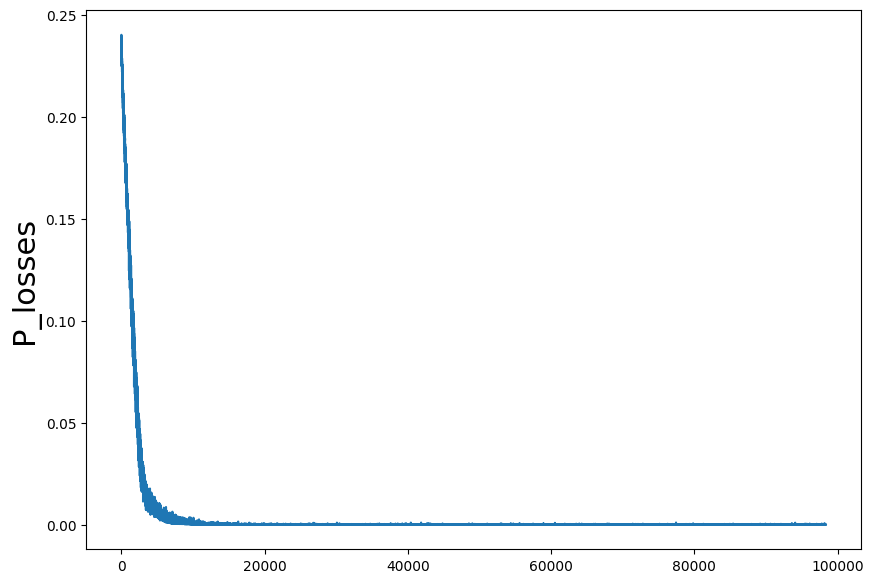

In [45]:
plt.figure(figsize=(10,7))
plt.plot(P_losses)
plt.ylabel("P_losses", fontsize=22)

Text(0, 0.5, 'mean_rewards')

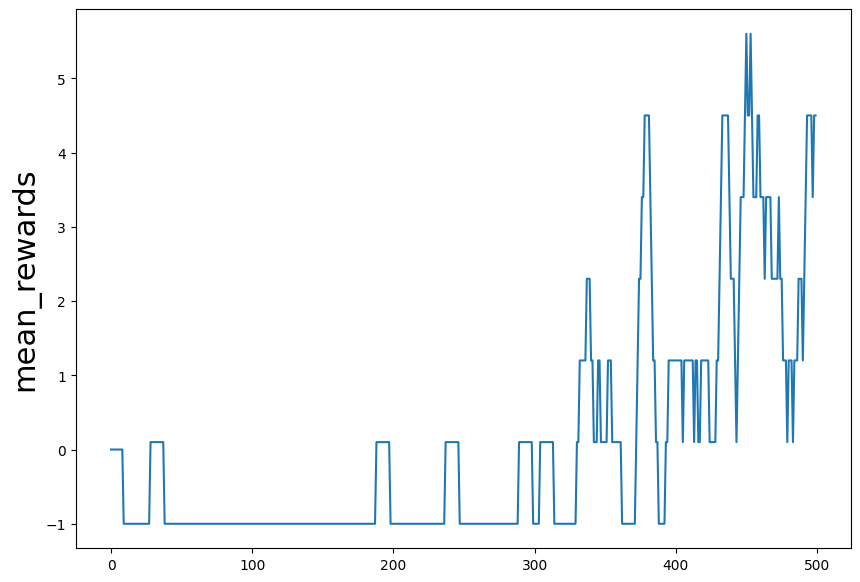

In [46]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.ylabel("mean_rewards", fontsize=22)

Text(0, 0.5, 'mean_rewards')

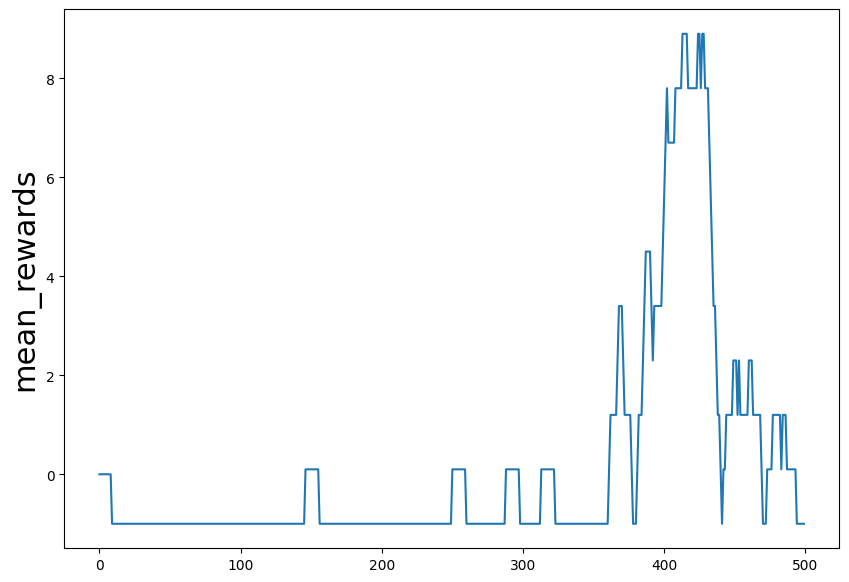

In [63]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.ylabel("mean_rewards", fontsize=22)

Text(0, 0.5, 'Q_losses')

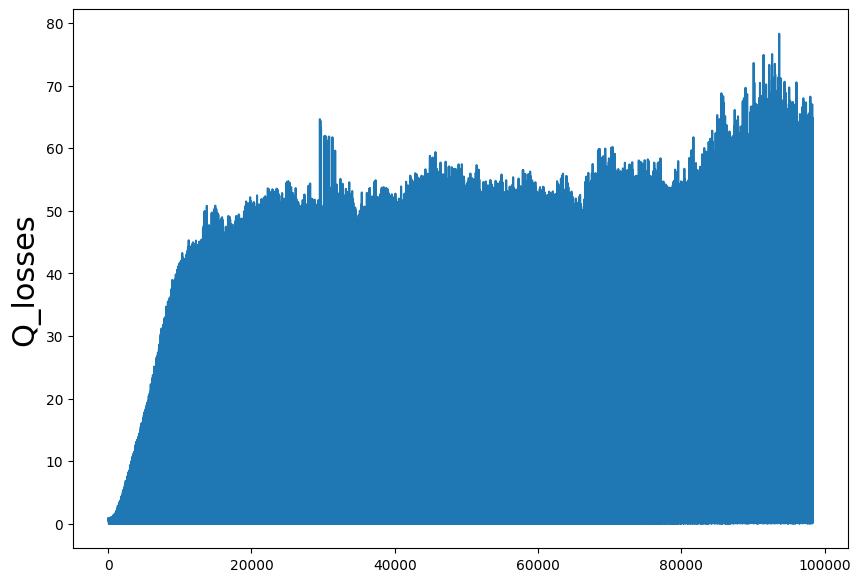

In [64]:
plt.figure(figsize=(10,7))
plt.plot(Q_losses)
plt.ylabel("Q_losses", fontsize=22)

In [29]:
import sys
sys.path.append("flappy-bird-gym/game")

In [30]:
from flappy_bird import GameState

In [31]:
env = GameState()

In [32]:
actions = {"up":[0,1], "do_nothing":[1,0]}

In [33]:
state2, r, done = env.frame_step(actions["up"])

In [34]:
state2.shape

(288, 512, 3)

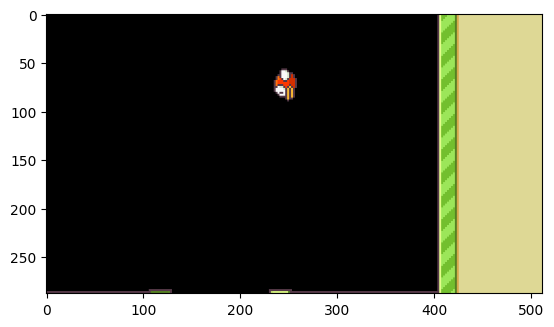

In [35]:
import matplotlib.pyplot as plt
plt.imshow(state2)

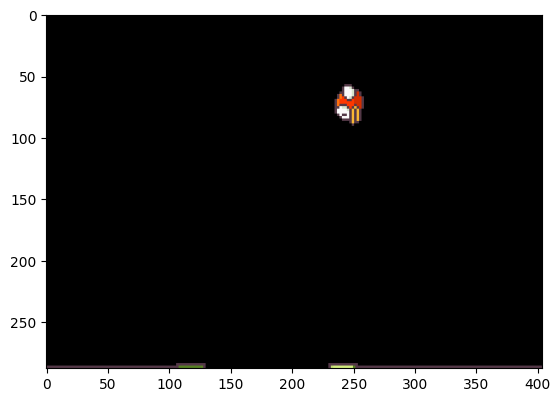

In [36]:
plt.imshow(state2[0:288, 0:404])

In [37]:
import cv2

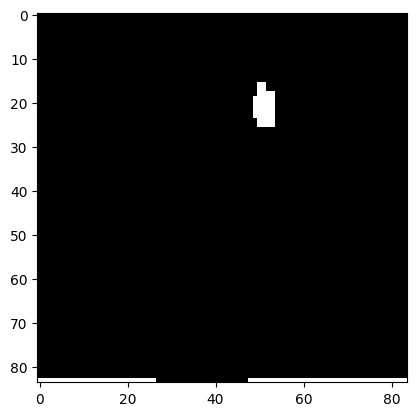

In [38]:
image = state2[0:288, 0:404]
image = cv2.cvtColor(cv2.resize(image, (84, 84)), cv2.COLOR_BGR2GRAY)
image[image > 0] = 255
plt.imshow(image, cmap='gray')

In [39]:
image.shape

(84, 84)

In [40]:
import numpy as np

image = np.reshape(image, (84, 84, 1))

In [41]:
def resize_and_bgr2gray(image):
    image = image[0:288, 0:404]
    image_data = cv2.cvtColor(cv2.resize(image, (84, 84)), cv2.COLOR_BGR2GRAY)
    image_data[image_data > 0] = 255
    image_data = np.reshape(image_data, (84, 84, 1))
    return image_data

In [42]:
class Conv_Q_Net(torch.nn.Module):
    def __init__(self, input_depth_length, output_shape):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(input_depth_length, 32, 8, stride=4)
        self.conv2 = torch.nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = torch.nn.Conv2d(64, 64, 3, stride=1)
        self.linear1 = torch.nn.Linear(3136, 512)
        self.linear2 = torch.nn.Linear(512, output_shape)
        # self.flatten = torch.nn.Flatten()
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.conv3(x)
        x = self.activation(x)
        x = x.view(x.size()[0], -1) # x = self.flatten(x)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x
        

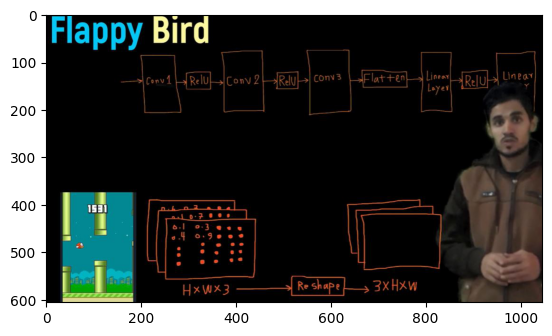

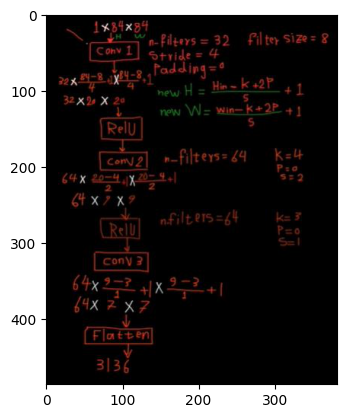

In [43]:
x=plt.imread('../convqlearning.JPG')
plt.imshow(x)
plt.show()
x=plt.imread('../convqlearning001.JPG')
plt.imshow(x)
plt.show()

In [44]:
input_depth_length = 1
output_shape = len(actions)
Agent_Q_Net = Conv_Q_Net(input_depth_length, output_shape).to(device)
input_shape = (1, 84, 84)

In [45]:
import copy
from collections import deque

mean_rewards = []
output_shape = 2
memory_size = 10000
batch_size = 200
replay = deque(maxlen=memory_size)
sync_freq = 20
gamma = 0.99
learning_rate = 1e-6
epochs = 4000
losses = []
input_shape = (1, 84, 84)
input_depth_length = 4
Agent = Conv_Q_Net(input_depth_length, output_shape).to(device)
target_network = copy.deepcopy(Agent)
target_network.load_state_dict(Agent.state_dict())

optimizer = torch.optim.Adam(Agent.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
epsilon = 0.2
mean_reward = 0
episodes_reward = []
for i in range(epochs):
    game = GameState()
    action = np.array([1, 0])
    state1, reward, done = game.frame_step(action)
    state1 = resize_and_bgr2gray(state1)
    state1 = preprocess_state(state1, input_shape, add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)

    state1 = torch.cat((state1, state1, state1, state1), dim=0).unsqueeze(0)
    status = 1
    k = 0
    pass_count = 0
    while (status == 1):
        k += 1
        qval = Agent(state1)
        qval_ = qval.data.detach().cpu().numpy()
        action_idx = get_action(qval_, 2, epsilon)
        action = np.array([0, 0])
        action[action_idx] = 1
        state2, reward, done = game.frame_step(action)
        if reward == 10:
            pass_count += 1
        state2 = resize_and_bgr2gray(state2)
        state2 = preprocess_state(state2, input_shape, add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        state2 = torch.cat((state1.squeeze(0)[1:, :,:], state2), dim=0).unsqueeze(0)
        exp = (state1, action_idx, reward, state2, done)
        replay.append(exp)
        if len(replay) > batch_size:
            state1_batch, action_batch, reward_batch, state2_batch, done_batch = get_batch(replay, batch_size, device)
            Q1 = Agent(state1_batch)
            with torch.no_grad():
                Q2 = target_network(state2_batch)

            maxQ = torch.max(Q2, axis=1)[0]
            Y = batch_target(reward_batch, gamma, maxQ, done_batch)
            X = Q1.gather(dim=1, index=action_batch.unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y)
            print("mean_reward: ", mean_reward)
            print(pass_count)

            print(i, loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            update(loss, optimizer)

        state1 = state2
        if k % sync_freq == 0:
            target_network.load_state_dict(Agent.state_dict())
        if done == True:
            episodes_reward.append(pass_count * 10)
            mean_reward = reward_metric(episodes_reward, 10)
            mean_rewards.append(mean_reward)
            status = 0
    if epsilon > 0.0001:
        epsilon -= (1/epochs)
        

4000


Text(0, 0.5, 'Mean rewards')

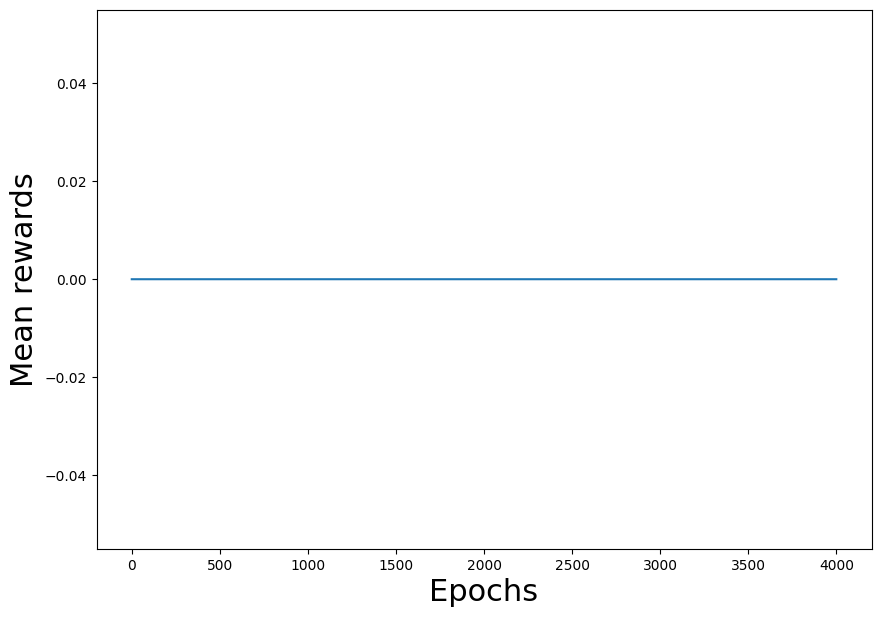

In [46]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.xlabel("Epochs", fontsize=22)
plt.ylabel("Mean rewards", fontsize=22)

In [61]:
torch.save(Agent, "conv_Q_Net.pt")

In [66]:
input_depth_length = 4
Agent = Conv_Q_Net(input_depth_length, output_shape).to(device)

In [67]:
Agent = torch.load("conv_Q_Net.pt")

In [68]:
import time

for i in range(10):
    game = GameState()
    action = np.array([1, 0])
    state1, reward, done = game.frame_step(action)
    state1 = resize_and_bgr2gray(state1)
    state1 = preprocess_state(state1, input_shape, add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)

    state1 = torch.cat((state1, state1, state1, state1), dim=0).unsqueeze(0)
    status = 1
    while (status == 1):
        qval = Agent(state1)
        qval_ = qval.data.detach().cpu().numpy()
        action_idx = get_action(qval_, 2, epsilon)
        action = np.array([0, 0])
        action[action_idx] = 1
        state2, reward, done = game.frame_step(action)
        state2 = resize_and_bgr2gray(state2)
        state2 = preprocess_state(state2, input_shape, add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        state2 = torch.cat((state1.squeeze(0)[1:, :,:], state2), dim=0).unsqueeze(0)
        state1 = state2
        time.sleep(.05)
        if done == True:
            status = 0

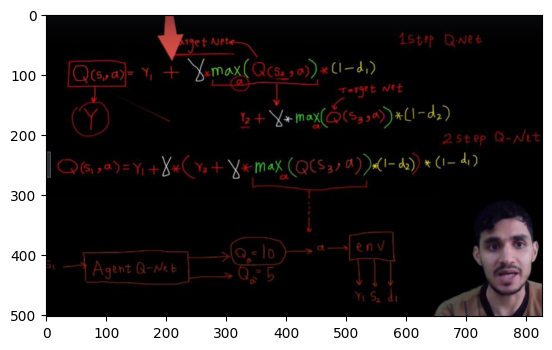

In [71]:
x=plt.imread('../2stepsQlearning003.JPG')
plt.imshow(x)
plt.show()

In [47]:
def get_batch_for_2steps_dqn(replay, batch_size, device="cpu"):
    minibatch = random.sample(replay, batch_size)
    state1_batch = torch.cat([s1 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)
    state2_batch = torch.cat([s2 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)
    state3_batch = torch.cat([s3 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)

    action1_batch = torch.Tensor([a1 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).long().to(device)
    action2_batch = torch.Tensor([a2 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).long().to(device)

    reward1_batch = torch.Tensor([r1 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)
    reward2_batch = torch.tensor([r2 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)

    done1_batch = torch.Tensor([d1 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)
    done2_batch = torch.Tensor([d2 for (s1,s2,s3,a1,a2,r1,r2,d1,d2) in minibatch]).to(device)

    return state1_batch, state2_batch, state3_batch, action1_batch, action2_batch, reward1_batch, reward2_batch, done1_batch, done2_batch

In [48]:
def batch_target_for_2steps_dqn(reward1_batch, reward2_batch, gamma, maxQ, done1_batch, done2_batch):
    Y = reward1_batch + (gamma * ((reward2_batch + gamma * maxQ) * (1 - done2_batch)) * (1 - done1_batch))
    return Y

In [49]:
import copy
from collections import deque

mean_rewards = []
output_shape = len(actions)
memory_size = 10000
batch_size = 64
replay = deque(maxlen=memory_size)
sync_freq = 20
gamma = 0.99
learning_rate = 1e-6
epochs = 4000
losses = []
input_shape = (1, 84, 84)
input_depth_length = 4
Agent = Conv_Q_Net(input_depth_length, output_shape).to(device)
target_network = copy.deepcopy(Agent)
target_network.load_state_dict(Agent.state_dict())

optimizer = torch.optim.Adam(Agent.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()
epsilon = 0.2
pass_count = 0
mean_reward = 0
episodes_reward = []
for i in range(epochs):
    game = GameState()
    action = np.array([0, 1])
    state1, reward, done = game.frame_step(action)
    state1 = resize_and_bgr2gray(state1)
    state1 = preprocess_state(state1, input_shape, add_noise=True)
    state1 = torch.from_numpy(state1).float().to(device)

    state1 = torch.cat((state1, state1, state1, state1), dim=0).unsqueeze(0)
    status = 1
    k = 0
    pass_count = 0
    while status == 1:
        k += 1
        qval = Agent(state1).detach()
        qval_ = qval.data.detach().cpu().numpy()
        action = np.array([0,0])
        action_idx1 = get_action(qval_, 2, epsilon)
        action[action_idx1] = 1
        state2, reward1, done1 = game.frame_step(action)
        if reward1 == 10:
            pass_count += 1
        state2 = resize_and_bgr2gray(state2)
        state2 = preprocess_state(state2, input_shape, add_noise=True)
        state2 = torch.from_numpy(state2).float().to(device)
        state2 = torch.cat((state1.squeeze(0)[1:, :, :], state2), dim=0).unsqueeze(0)
        if done1 == False:
            qval = target_network(state2).detach()
            qval_ = qval.data.detach().cpu().numpy()
            action_idx2 = get_action(qval_, 2, epsilon)
            action = np.array([0,0])
            action[action_idx2] = 1
            state3, reward2, done2 = game.frame_step(action)
            if reward2 == 10:
                pass_count += 1
            state3 = resize_and_bgr2gray(state3)
            state3 = preprocess_state(state3, input_shape, add_noise=True)
            state3 = torch.from_numpy(state3).float().to(device)
            state3 = torch.cat((state2.squeeze(0)[1:, :, :], state3), dim=0).unsqueeze(0)
            exp = (state1, state2, state3, action_idx1, action_idx2, reward1, reward2, done1, done2)
        else:
            state3 = state2
            exp = (state1, state2, state2, action_idx1, action_idx1, reward1, reward1, True, True)

        replay.append(exp)
        if len(replay) > batch_size:
            state1_batch, state2_batch, state3_batch, action1_batch, action2_batch, \
            reward1_batch, reward2_batch, \
            done1_batch, done2_batch = get_batch_for_2steps_dqn(replay, batch_size, device)
            Q1 = Agent(state1_batch)

            with torch.no_grad():
                Q3 = target_network(state3_batch)

            maxQ = torch.max(Q3, axis = 1)[0]
            Y = batch_target_for_2steps_dqn(reward1_batch, reward2_batch, gamma, maxQ, done1_batch, done2_batch)
            X = Q1.gather(dim=1, index=action1_batch.unsqueeze(dim=1)).squeeze()

            loss = loss_fn(X, Y.detach())
            print("mean reward: ", mean_reward)
            print(i, loss.item())
            clear_output(wait=True)
            losses.append(loss.item())
            update(loss, optimizer)

        state1 = state3
        if k % sync_freq == 0:
            target_network.load_state_dict(Agent.state_dict())

        if done1 == True or (done1 == False and done2 == True) or pass_count == 30:
            episodes_reward.append(pass_count * 10)
            mean_reward = reward_metric(episodes_reward, 10)
            mean_rewards.append(mean_reward)
            status = 0

    if epsilon > 0.0001:
        epsilon -= (1/epochs)
        

4000


Text(0, 0.5, 'Mean rewards')

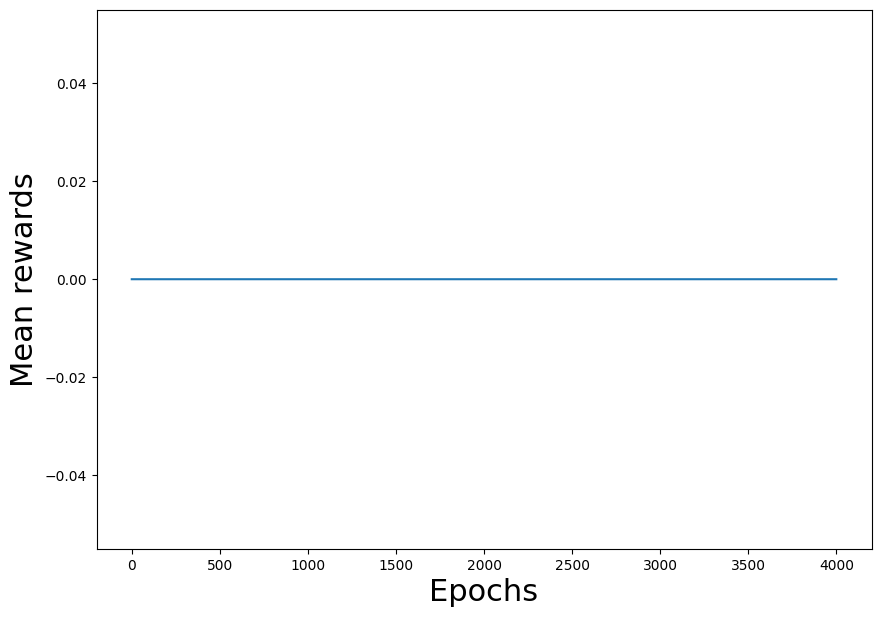

In [50]:
plt.figure(figsize=(10,7))
plt.plot(mean_rewards)
plt.xlabel("Epochs", fontsize=22)
plt.ylabel("Mean rewards", fontsize=22)